In [1]:
# from utils import read_triplets
import networkx as nx

def read_triplets():
    with open('../data/family_triplets.txt') as f:
        lines = f.readlines()
        return lines


Graph with 205 nodes and 324 edges


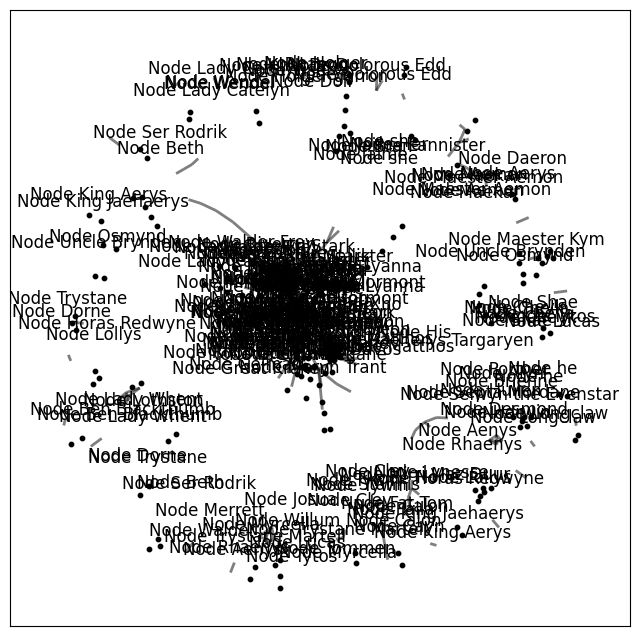

In [36]:
# Probaš z networkx
# Vidš, da ni to to
import matplotlib.pyplot as plt

G = nx.Graph()    
triplets = read_triplets()
for t in triplets:
    first, rel, sec = t.split(';')
    # print(rel)
    # if rel in ['per:parents', 'per:children', 'per:siblings']:
        # Dodamo osebe kot node
    if rel != 'per:siblings' and first not in ['his', 'her', 'His', 'Her', 'him'] and sec not in ['his', 'her', 'His', 'Her', 'him']:
        if first not in G.nodes:
            G.add_node(first)
        if sec not in G.nodes:
            G.add_node(sec)

        G.add_edge(first, sec)
        # break

print(G)
# nx.draw(G, with_labels = True, node_size=20, pos=nx.spring_layout(G, k=1.5), alpha=0.2)¸

fig, ax = plt.subplots(figsize=(8, 8))
edge_attributes = {(u, v): {'alpha': 0.5} for u, v in G.edges()}
node_labels = {n: f'Node {n}' for n in G.nodes()}
nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color='black', node_size=10, ax=ax)
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), edge_color='black', width=2, edge_cmap=plt.cm.Blues, alpha=0.5, ax=ax)
nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels=node_labels, font_size=12, ax=ax)
plt.show()


In [101]:
from igraph import *

def get_edge_color(rel_type):
    if rel_type == 'per:parents':
        return 'blue'
    if rel_type == 'per:siblings':
        return 'gray'
    if rel_type == 'per:children':
        return 'green3'
    if rel_type == 'per:spouse':
        return 'magenta'
    else: 
        return 'cyan'
    
def get_color_dict():
    colors = ['blue', 'green3', 'gray', 'magenta', 'cyan']
    labels = ["parents", 'children', "siblings", 'spouse', 'other']
    color_dict = dict(zip(colors, labels))
    return colors, color_dict

def add_node(G, name):
    try:
        vertex = G.vs.find(name)
    except ValueError: # does not exist
        G.add_vertex(name)

def add_nodes_edges(G, first, sec):
    add_node(G, first)
    add_node(G, sec)
    G.vs.find(first)['label'] = first
    G.vs.find(sec)['label'] = sec

G = Graph()    
triplets = read_triplets()
for t in triplets:
    first, rel, sec = t.split(';')
    sec = sec.replace('\n', '')
    # Ne dodajamo nodov/povezav, ki se ne nanašajo na osebo 
    # rel != 'per:siblings' and 
    if first not in ['his', 'her', 'His', 'Her', 'him'] and sec not in ['his', 'her', 'His', 'Her', 'him']:
        add_nodes_edges(G, first, sec)
        
        if not G.are_connected(first, sec):
            G.add_edge(first, sec, color=get_edge_color(rel))

char_list = []
for v in G.vs:
    label = v['label']
    char_list.append((label, v.degree()))

char_list = sorted(char_list, key=lambda x: x[1], reverse=True)[0:20]
labels_list = [label for label, degree in char_list]
print(char_list)
print(labels_list)
delete_vertices = []
for v in G.vs:
    if v['label'] not in labels_list:
        delete_vertices.append(v.index)
G.delete_vertices(delete_vertices)
# print(G.vs)
# print(G)
# nx.draw(G, with_labels = True, node_size=10)

[('Joffrey', 20), ('Robert', 16), ('Robb', 14), ('Rickard', 14), ('Edwyle', 13), ('Rodwell', 13), ('Donnor', 13), ('Jonnel', 13), ('Barth', 13), ('Cregan', 13), ('Artos', 13), ('Willam', 13), ('Beron', 13), ('Lyanna', 11), ('Rickard Stark Lyanna', 11), ('Catelyn', 8), ('Tyrion', 8), ('Jon', 7), ('Winterfell', 7), ('Ser Edmure Tully', 7)]
['Joffrey', 'Robert', 'Robb', 'Rickard', 'Edwyle', 'Rodwell', 'Donnor', 'Jonnel', 'Barth', 'Cregan', 'Artos', 'Willam', 'Beron', 'Lyanna', 'Rickard Stark Lyanna', 'Catelyn', 'Tyrion', 'Jon', 'Winterfell', 'Ser Edmure Tully']


[('blue', 'parents'), ('green3', 'children'), ('gray', 'siblings'), ('magenta', 'spouse'), ('cyan', 'other')]


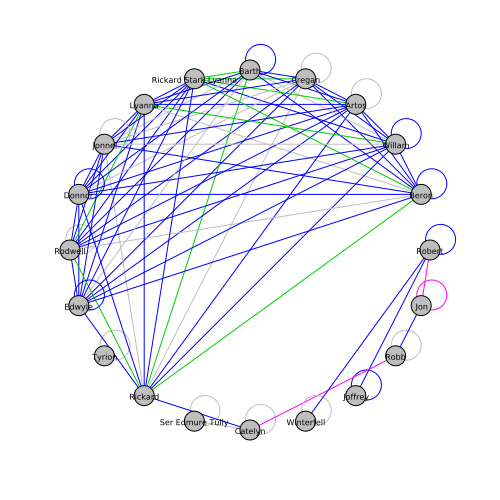

In [110]:
# pip install python-igraph
# pip install cairocffi
out_fig_name = "graph.eps"

visual_style = {}

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (500,500)
visual_style["margin"] = 70

# Set vertex colours
visual_style["vertex_color"] = 'grey'

# Set vertex 
visual_style["vertex_size"] = 20

# Set vertex lable size
visual_style["vertex_label_size"] = 8

# Don't curve the edges
visual_style["edge_curved"] = False

visual_style["edge_color"] = G.es["color"]
visual_style["vertex_spacing"] = 1000

# Set the layout
# my_layout = G.layout_fruchterman_reingold()
my_layout = G.layout_circle()
# my_layout = G.layout("kk", dim=2, spacing=100)
# my_layout = G.layout_fruchterman_reingold(maxiter=1000, coolexp=0.5)
visual_style["layout"] = my_layout

colors, color_dict = get_color_dict()
legend = [(color, color_dict[color]) for color in colors]
print(legend)
# Plot the graph
plot(G, out_fig_name, **visual_style)
# p.save("my_graph.pdf")

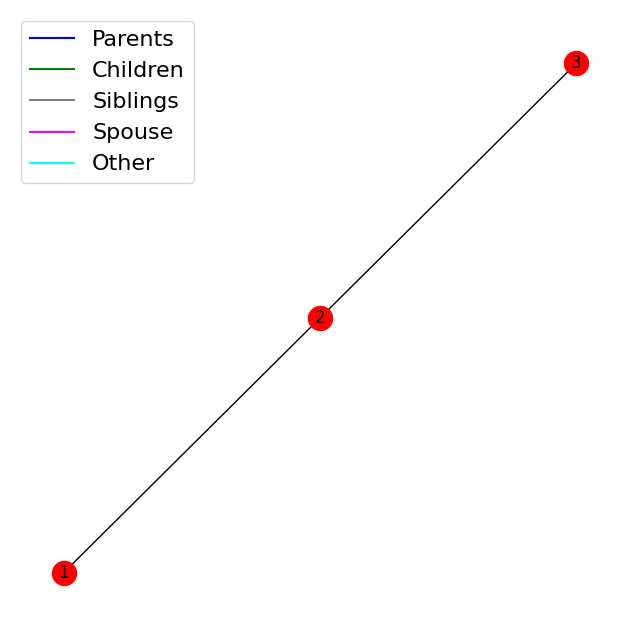

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3)])

# create a plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# draw the graph
nx.draw(G, with_labels=True, node_color='red', edge_color='black', ax=ax)

# create a legend
legend_dict = {'Parents': plt.Line2D([], [], color='blue'), 
               'Children': plt.Line2D([], [], color='green'), 
               'Siblings': plt.Line2D([], [], color='gray'), 
               'Spouse': plt.Line2D([], [], color='magenta'), 
               'Other': plt.Line2D([], [], color='cyan')}
ax.legend(legend_dict.values(), legend_dict.keys(), fontsize=16)

# show the plot
plt.show()

In [108]:
from igraph import Graph, plot

# create a graph
g = Graph()
g.add_vertices(5)
g.add_edges([(0,1), (1,2), (2,3), (3,4), (4,0)])

# create a plot
p = plot(g, bbox=(300, 300), margin=20)

# set the visual style
visual_style = {}
visual_style["vertex_color"] = "blue"
visual_style["vertex_size"] = 20
visual_style["edge_width"] = 2

# apply the visual style
p = plot(g, bbox=(300, 300), margin=20, **visual_style)

# save the plot to a file
p.save("my_graph.png")
